In [49]:
!python spacetimeformer/StockForecaster.py

In [62]:
from spacetimeformer.StockForecaster import Stock42

# Instantiate the class
stock = Stock42()

# You can now call methods on the `stock` object
# stock.CreateModel() # Model Scaffold
# stock.LoadModelFromFile()  # Load Weights
stock.connectIB()
stock.GetCurrentData()

Getting Data for equities...


AttributeError: 'DataFrame' object has no attribute 'append'

In [59]:
stock.MuSigTix

,ticker,closemu,closesig,volmu,volsig


In [63]:
stock.disconnectIB()
# stock.GetCurrentData()

In [10]:
!python spacetimeformer/train.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 60 --target_points 10 --epochs 200 --gpus 0 --activation gelu --dropout_emb 0.15 --dropout_qkv 0.15 --dropout_ff 0.15 --dropout_attn_out 0.15 --dropout_attn_matrix 0.15 --learning_rate 1e-5 --enc_layers 3 --dec_layers 4 --loss mse --n_heads 4 --d_model 512 --d_ff 2048


Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): FullAttention(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (query_projection): Linear(in_features=512, out_features=800, bias=True)
  (key_projection): Linear(in_features=512, out_features=800, bias=True)
  (value_projection): Linear(in_features=512, out_features=800, bias=True)
  (out_projection): Linear(in_features=800, out_features=512, bias=True)
  (dropout_qkv): Dropout(p=0.15, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): FullAttention(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (query_projection): Linear(in_features=512, out_features=800, bias=True)
  (key_projection): Linear(in_features=512, out_features=800, bias=True)
  (value_projection): Linear(in_features=512, out_features=800, bias=True)
  (out_projection): Linear(in_features=800, out_features=512, bias=True)
  (dropout_qkv)

In [18]:
%cd ..
!pwd

/Users/alecjeffery/Documents/Playgrounds/Python/spacetimeformer_stocks
/Users/alecjeffery/Documents/Playgrounds/Python/spacetimeformer_stocks


In [45]:
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 64 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 100 --target_points 10 --epochs 200 --activation gelu --dropout_emb 0.3 --dropout_qkv 0.3 --dropout_ff 0.3 --dropout_attn_out 0.3 --dropout_attn_matrix 0.3 --learning_rate 1e-5 --enc_layers 5 --dec_layers 6 --loss mse --n_heads 6 --d_model 512 --d_ff 2048

# most recent (Ran on Feb 14th)
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 60 --target_points 10 --epochs 200 --gpus 0 --activation gelu --dropout_emb 0.15 --dropout_qkv 0.15 --dropout_ff 0.15 --dropout_attn_out 0.15 --dropout_attn_matrix 0.15 --learning_rate 5e-6 --enc_layers 4 --dec_layers 5 --loss mse --n_heads 4 --d_model 256 --d_ff 1024
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 64 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 120 --target_points 20 --epochs 200 --activation gelu --dropout_emb 0.3 --dropout_qkv 0.3 --dropout_ff 0.3 --dropout_attn_out 0.3 --dropout_attn_matrix 0.3 --learning_rate 5e-6 --enc_layers 5 --dec_layers 6 --loss mse --n_heads 5 --d_model 400 --d_ff 1600
!python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 90 --target_points 10 --epochs 200 --activation gelu --dropout_emb 0.15 --dropout_qkv 0.15 --dropout_ff 0.15 --dropout_attn_out 0.15 --dropout_attn_matrix 0.15 --learning_rate 5e-6 --enc_layers 4 --dec_layers 5 --loss smape --n_heads 4 --d_model 512 --d_ff 2048
# !python spacetimeformer/pred_fromfile.py spacetimeformer stocks --embed_method spatio-temporal --batch_size 256 --local_self_attn full --local_cross_attn full --global_self_attn full --global_cross_attn full --run_name stocks_spatiotemporal --context_points 100 --target_points 10 --epochs 200 --activation gelu --dropout_emb 0.3 --dropout_qkv 0.3 --dropout_ff 0.3 --dropout_attn_out 0.3 --dropout_attn_matrix 0.3 --learning_rate 1e-5 --enc_layers 4 --dec_layers 5 --loss smape --n_heads 4 --d_model 512 --d_ff 2096

FFUUUUCK
Eval Dataset Shape:  torch.Size([98, 90, 95])
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): FullAttention(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (query_projection): Linear(in_features=512, out_features=800, bias=True)
  (key_projection): Linear(in_features=512, out_features=800, bias=True)
  (value_projection): Linear(in_features=512, out_features=800, bias=True)
  (out_projection): Linear(in_features=800, out_features=512, bias=True)
  (dropout_qkv): Dropout(p=0.15, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): FullAttention(
    (dropout): Dropout(p=0.15, inplace=False)
  )
  (query_projection): Linear(in_features=512, out_features=800, bias=True)
  (key_projection): Linear(in_features=512, out_features=800, bias=True)
  (value_projection): Linear(in_features=512, out_features=800, bias=True)
  (out_projection): Linear(in_fea

In [41]:
# Get the current date
import datetime

current_date = datetime.datetime.now()
formatted_date = f"{current_date.month}_{current_date.day}_{current_date.year}"
a.to_csv('oos_predictions_'+formatted_date+'.csv')

3_5_2024


In [42]:

import pandas as pd
import datetime

a = pd.read_csv('oos_predictions.csv', index_col=0)
b = pd.read_csv('TixMuSig.csv',index_col=1)

col = ['Close_'+str(i) for i in range(1,11)]
Vcol = ['Volatility_'+str(i) for i in range(1,11)]
for i in a.index:
    a.loc[i][col] = a.loc[i][col]*b.loc[i].closesig + b.loc[i].closemu
    a.loc[i][Vcol] = a.loc[i][Vcol]*b.loc[i].volsig + b.loc[i].volmu

current_date = datetime.datetime.now()
formatted_date = f"{current_date.month}_{current_date.day}_{current_date.year}"

a.to_csv('oos_predictions_'+formatted_date+'.csv')

#%%
a['Price_PrctDelta'] = 100*(a['Close_10']-a['Close_1'])/a['Close_1']
a['Volatility_PrctDelta'] = 100*(a['Volatility_10']-a['Volatility_1'])/a['Volatility_1']
#%%

PossibleLongCalls = a[(a['Price_PrctDelta'] > 0) & (a['Volatility_PrctDelta'] > 0)]
PossibleLongPuts = a[(a['Price_PrctDelta'] < 0) & (a['Volatility_PrctDelta'] > 0)]

PossibleLongs = a[(a['Price_PrctDelta'] > 0)]
PossibleShorts = a[(a['Price_PrctDelta'] < 0)]

VolPump = a[(a['Volatility_PrctDelta'] > 0)]
VolDump = a[(a['Volatility_PrctDelta'] < 0)]

#%%

Calls=PossibleLongCalls[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=False)
Puts=PossibleLongPuts[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=True)

Longs=PossibleLongs[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=False)
Shorts=PossibleShorts[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Price_PrctDelta',ascending=True)

LongVol=VolPump[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Volatility_PrctDelta',ascending=False)
ShortVol=VolDump[['Price_PrctDelta','Volatility_PrctDelta']].sort_values(by='Volatility_PrctDelta',ascending=True)

print('Long: ',Longs[Longs['Price_PrctDelta'] > 2].Price_PrctDelta)
print('Short: ',Shorts[Shorts['Price_PrctDelta'] < -2].Price_PrctDelta)

print('Long Calls: ', Calls[ (Calls['Price_PrctDelta'] > 2) &(Calls['Volatility_PrctDelta'] > 5)].Price_PrctDelta)
print('Long Puts: ',Puts[ (Puts['Price_PrctDelta']< -2) & (Puts['Volatility_PrctDelta'] > 5)].Price_PrctDelta)

print('Long Volatility: ',LongVol[LongVol.Volatility_PrctDelta > 20].Volatility_PrctDelta)
print('Short Volatility: ',ShortVol[ShortVol.Volatility_PrctDelta < -20].Volatility_PrctDelta)


# print('Long Butterfly: ',Calls[ (Calls['Price_PrctDelta']<5) &(Calls['Volatility_PrctDelta']>10)].print('Long Volatility: ',LongVol[LongVol.Volatility_PrctDelta > 20].Volatility_PrctDelta))
# print('Short Butterfly: ',VolDump[ (VolDump['Price_PrctDelta']<5) &(Calls['Volatility_PrctDelta']>10)].print('Long Volatility: ',LongVol[LongVol.Volatility_PrctDelta > 20].Volatility_PrctDelta))

Long:  ADM     4.922974
HUM     3.951606
TSLA    2.867860
PFE     2.105454
Name: Price_PrctDelta, dtype: float64
Short:  AVGO   -6.911745
AMD    -4.912298
LLY    -4.668849
NVDA   -4.611718
DELL   -4.258548
COST   -3.831872
IBM    -2.971356
CRM    -2.832446
GE     -2.711430
META   -2.661728
PGR    -2.464964
CAT    -2.402875
NFLX   -2.340926
AXP    -2.339397
AMZN   -2.269164
PSX    -2.231768
AIG    -2.169823
MCK    -2.080084
CAH    -2.066821
COR    -2.021663
Name: Price_PrctDelta, dtype: float64
Long Calls:  ADM     4.922974
TSLA    2.867860
Name: Price_PrctDelta, dtype: float64
Long Puts:  AMD    -4.912298
LLY    -4.668849
NVDA   -4.611718
DELL   -4.258548
IBM    -2.971356
CRM    -2.832446
GE     -2.711430
META   -2.661728
CAT    -2.402875
NFLX   -2.340926
AXP    -2.339397
AMZN   -2.269164
PSX    -2.231768
AIG    -2.169823
MCK    -2.080084
CAH    -2.066821
COR    -2.021663
Name: Price_PrctDelta, dtype: float64
Long Volatility:  PFGC    32.319744
NFLX    31.113171
WFC     26.950400
IBM  

In [33]:
Calls.Volatility_PrctDelta

ADM       5.270171
HUM       1.899690
TSLA     13.813908
PFE       4.633812
BMY       7.415326
BA        8.494836
RTX      17.028933
UPS      18.989091
ABEV     14.287586
DE       11.606953
MRO       9.991662
CSCO     19.811880
MMM      20.919027
UAL      13.475803
CVX      10.047510
LMT      21.265726
HP       11.770851
XOM       7.880851
CMCSA    15.442983
PEP      13.752635
AAPL      9.469445
ACI      18.894587
T        16.540056
CIG      11.786511
GOOG     19.428432
TSN      16.772623
COP      10.051280
JNJ      12.692306
Name: Volatility_PrctDelta, dtype: float64

,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,...,Volatility_3,Volatility_4,Volatility_5,Volatility_6,Volatility_7,Volatility_8,Volatility_9,Volatility_10,Price_PrctDelta,Volatility_PrctDelta
CSCO,47.422400,47.512489,47.582193,47.628168,47.678689,47.735994,47.781971,47.820304,47.875679,47.893487,...,0.141301,0.140720,0.145070,0.148802,0.152113,0.154875,0.157698,0.162360,0.993385,19.811880
UAL,43.335533,43.410329,43.312234,43.391751,43.305932,43.327004,43.372176,43.616424,43.549779,43.719224,...,0.374223,0.379737,0.389005,0.394975,0.400446,0.408417,0.413480,0.420360,0.885396,13.475803
MRO,23.799064,23.852876,23.906715,23.924765,23.926224,23.994990,24.004730,24.005115,24.008450,24.049982,...,0.289500,0.291297,0.296971,0.300119,0.303288,0.306344,0.310891,0.315311,1.054319,9.991662
BA,197.998104,198.421355,198.656323,199.409078,199.735085,199.850829,200.013674,200.670970,200.373315,200.804095,...,0.279619,0.281215,0.285690,0.288783,0.291263,0.295066,0.297843,0.301864,1.417181,8.494836
V,281.391264,280.798628,279.960473,279.730095,278.972868,278.413556,277.926590,278.210233,277.246546,277.096544,...,0.141843,0.144851,0.148236,0.152751,0.156690,0.160971,0.164874,0.169658,-1.526245,25.291852


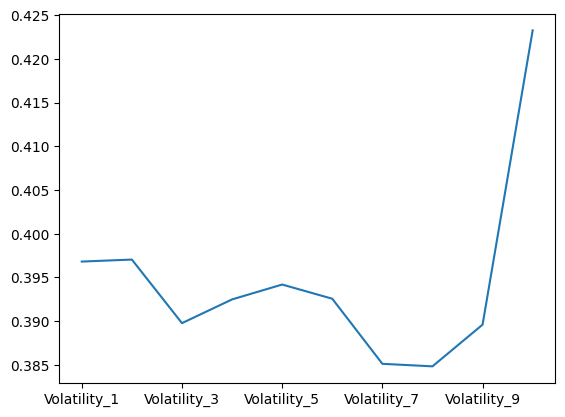

In [30]:
a.loc['DELL'][Vcol].plot()
a.loc['DELL']['Volatility_10']

a.head()

In [31]:
a.to_csv('OOS_3_3_2024.csv')